# DATA2 -  DESCRIPTIVE: DATA BALANCE CHECK 

## SPLIT BETWEEN TRAIN AND TEST SETS
 


**Resources**
1. DATA
    1. [data/data2](https://github.com/MMIV-ML/MCI-subgroups/tree/master/data/data2) - csv files downloaded from ADNI,
    1. [data/data2_FS](https://github.com/MMIV-ML/MCI-subgroups/tree/master/data/data2_FS) - FS result csv files,
    1. [data_zip/20201109_data2_file_versions](https://github.com/MMIV-ML/MCI-subgroups/blob/master/data/data_zip/20201109_data2_file_versions.pdf) - download ADNI web page screen shoot taken for downaloaded csv files (some of file neames are printed with dates),
1. RESULTS
    1. [results/20201110](https://github.com/MMIV-ML/MCI-subgroups/tree/master/results/20201110) - result folder,
    1. [results/20201120/README.md](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20201110/README.md) - short description,
1. GOOGLE DRIVE
    1. [slides](https://docs.google.com/presentation/d/1aEK7M5BPe0RxWYskzQCEDbT4Mf-4mRRqQ5uJ_YuqRzg/edit#slide=id.p) - link to google slides (**OUT OF DATE, MUST BE UPDATED !!!**),
    1. [GoogleDrive](https://drive.google.com/drive/folders/1r8l2R88-0T8Xahk30iAgjBCWXvV1R2J-) - the main google drive slide folder,
1. GIT HUB
    1. [GitHub](https://github.com/MMIV-ML/MCI-subgroups) - the main repo on-line folder,


The latest changes (ver. 0.04):

    - updated to new column names
    
   *Created: 2021.03.09 / Updated: 2021.04.04*

---

#### IMPORTS

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

#### MCI MODULES

In [3]:
# our imports 
import mci_get as mget
import mci_info as minfo
import mci_preprocessing as mpre
import mci_linking as mlink
import mci_balancing as mbal
import mci_utils as mutils

#### GLOBAL VARIABLES

In [4]:
# Notebook folder
NB_DIR = %pwd
NB_DIR = Path(NB_DIR)
# Root MCI foler
ROOT_DIR = NB_DIR.parent
# Data folder
DATA_DIR = ROOT_DIR/'data/data2'
# Results folder
RESULTS_DIR = ROOT_DIR/'results'
#RESULTS_DIR.mkdir(parents=True, exist_ok=True)

#### SELECTED PROPERTIES

In [5]:
# DEFAULT VALUE: 6
pd.options.display.precision = 2

#### INSTALLED PACKAGES INFO

In [6]:
if 1:
    packages = ['numpy', 'scipy', 'seaborn', 'pandas', 'matplotlib', 'statsmodels', 'ipywidgets','eli5', 'pdpbox']
    display(mutils.package_versions(installedOnly=False, theMostImportant=packages))



Computer name: mk-prec-7540
Operating system: Linux, 64bit

Python path: /home/marek/miniconda3/envs/mci/bin/python
Python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0]



,module,version
4,eli5,0.11.0
6,ipywidgets,7.6.5
10,matplotlib,3.4.2
13,numpy,1.21.2
15,pandas,1.3.4
16,pdpbox,0.2.1
20,scipy,1.7.1
21,seaborn,0.11.2
24,statsmodels,0.13.0


---

# LOAD FILES

In [7]:
long = pd.read_csv(RESULTS_DIR / '20201110' / 'long.csv', index_col=0, low_memory=False)
bl = pd.read_csv(RESULTS_DIR / '20201110' / 'bl.csv', index_col=0, low_memory=False)

####  THE baseline TABLE INFO. 

In [8]:
minfo.df_info(bl, 0, "Loaded 'Baseline' file")

LOADED 'BASELINE' FILE:
	Rows(exams): 708,
	Columns (features): 133,
	Patients number (unique RID): 708,
		Patients with at least one MRI image (MRIs): 708,
		Patients without any MRI image (MRIs): 0,
	MRI images (IMAGEUID): 706.




In [9]:
# print(bl.shape)
# print(bl.columns)

#### LIST OF INCLUDED COLUMN BY SOURCE FILE

Columns originated from different source files:
 - adnimerge,
 - neurobat,
 - gdscale,
 - added by us (with underscore suffix).

In [10]:
minfo.included_feature_info(bl, pattern='adas-neuro-cross-long-gds-_')

Total number of columns: 133



,adas (#16),neuro (#14),gds (#5),long (#10),cross (#10),ours (#31)
0,MERGE_long_adas,ANARTERR_neuro,EXAMDATE_gds,LHHC_long,LHHC_cross,ADAS13_adni_Nr_
1,Q10_adas,AVDEL30MIN_neuro,GDTOTAL_gds,LLV_long,LLV_cross,Abeta_
2,Q11_adas,AVDELTOT_neuro,MERGE_long_gds,LRHHC_long,LRHHC_cross,Age_at_scan_
3,Q12_adas,AVTOT6_neuro,Phase_gds,LRHHC_n_long,LRHHC_n_cross,Age_at_scan_rounded_
4,Q13_adas,AVTOTB_neuro,VISCODE2_gds,LRLV_long,LRLV_cross,Age_bin_
5,Q1_adas,CATANIMSC_neuro,,LRLV_n_long,LRLV_n_cross,Age_rounded_
6,Q2_adas,CLOCKSCOR_neuro,,RHHC_long,RHHC_cross,Apoe4_
7,Q3_adas,COPYSCOR_neuro,,RLV_long,RLV_cross,FAQBEVG_faq_cod_
8,Q4_adas,EXAMDATE_neuro,,complete_long,complete_cross,FAQEVENT_faq_cod_
9,Q5_adas,MERGE_long_neuro,,eTIV_long,eTIV_cross,FAQFINAN_faq_cod_


#### SUBSET OF COLUMNS

Out of the the main table, we select the subset of column names to limit the size of further tables. (Displayed the first 10 rows of limited bl table.)

In [11]:
cols = ['RID', 'PTGENDER', 'AGE', 'Age_rounded_', 'ADAS13_adni', 'ADAS13_adni_Nr_',
        'TOTAL13_adas', 'TOTAL13_adas_Nr_',  'MRIs_Nr_', 'Subgroup_', 'Participation_length_yr_', 'Visits_Nr_']

In [12]:
bl[cols].head(10)

,RID,PTGENDER,AGE,Age_rounded_,ADAS13_adni,ADAS13_adni_Nr_,TOTAL13_adas,TOTAL13_adas_Nr_,MRIs_Nr_,Subgroup_,Participation_length_yr_,Visits_Nr_
0,4,Male,67.5,68,21.33,5,21.33,5,5,sMCI,3.03,6
6,6,Female,80.4,80,25.67,6,25.67,6,5,sMCI,3.03,7
13,30,Female,80.0,80,22.00,6,22.00,6,6,cAD,3.10,7
20,33,Male,83.3,83,25.67,6,25.67,6,6,sMCI,3.09,6
26,38,Male,76.8,77,16.33,3,16.33,3,3,sMCI,0.98,3
29,41,Female,70.9,71,28.33,7,28.33,7,7,cAD,4.17,8
37,42,Male,72.8,73,12.00,11,12.00,11,9,cAD,8.50,18
55,50,Male,77.6,78,29.00,5,29.00,5,5,cAD,2.96,7
62,51,Male,66.5,66,17.67,11,17.67,11,6,cAD,10.11,13
75,54,Female,81.0,81,32.33,6,32.33,6,5,cAD,2.98,7


In [13]:
#minfo.iterate_patient_GUI(bl[cols])

#### SIMPLE STATS

In [14]:
minfo.df_stats_info(bl[cols])

,max.,mean,min.,std,val_range,NaN_Nr
RID,5099.00,2454.68,4.00,1779.94,5095.00,0
AGE,91.40,73.44,55.00,7.32,36.40,0
Age_rounded_,91.00,73.42,55.00,7.32,36.00,0
ADAS13_adni,39.67,17.19,3.00,6.60,36.67,2
ADAS13_adni_Nr_,15.00,6.36,2.00,2.44,13.00,0
TOTAL13_adas,39.67,17.19,3.00,6.60,36.67,2
TOTAL13_adas_Nr_,15.00,6.36,2.00,2.44,13.00,0
MRIs_Nr_,12.00,5.57,3.00,1.60,9.00,0
Participation_length_yr_,13.85,4.78,0.53,2.78,13.32,0
Visits_Nr_,21.00,8.95,3.00,3.79,18.00,0


---

# DATA SPLITTING

In [15]:
minfo.feature_split_info(bl, 'Subgroup_', col_name="Subjs")

,Subgroup_,# Subjs,% Subjs
1,cAD,327,0.46
0,sMCI,381,0.54


#### TRAIN / TEST SETS WITH "**StratifiedShuffleSplit**" FUNCTION

In [16]:
bl = mbal.train_test_split_baseline(bl,age_bins=[50,60,70,80,95],  split_categories=['Age_bin_', 'Subgroup_', 'PTGENDER'],
                                    test_size=0.2, random_state=42, df_name='bl', sh=True)

A new column "Age_bin_" is added to the "bl" table
A new column "Usage_" is added to the "bl" table


#### TRAIN / TEST / BL size

In [17]:
print(bl.shape[0])
print(bl.Usage_.value_counts())

708
train    566
test     142
Name: Usage_, dtype: int64


#### VALUE\_COUNTS FOR "AGE\_bin\_"

In [18]:
mbal.check_train_test_bl_balance(bl, feature_name='Age_bin_', display_type='%')

,Age_bin_,% train_set,% test_set,% bl (all)
3,(50-60],0.05,0.04,0.05
1,(60-70],0.28,0.29,0.28
0,(70-80],0.49,0.49,0.49
2,(80-95],0.18,0.18,0.18


#### VALUE\_COUNTS FOR "Subgroup\_"

In [19]:
mbal.check_train_test_bl_balance(bl, feature_name='Subgroup_', display_type='%')

,Subgroup_,% train_set,% test_set,% bl (all)
1,cAD,0.46,0.46,0.46
0,sMCI,0.54,0.54,0.54


#### VALUE\_COUNTS FOR GENDER

In [20]:
mbal.check_train_test_bl_balance(bl, feature_name='PTGENDER', display_type='%')

,PTGENDER,% train_set,% test_set,% bl (all)
1,Female,0.4,0.41,0.4
0,Male,0.6,0.59,0.6


#### MANUAL INSPECTION

In [21]:
check = 1
if check:
    train_set = bl.loc[bl.Usage_ == 'train']
    test_set = bl.loc[bl.Usage_ == 'test'] 

    print(len(train_set)/len(bl), len(test_set)/len(bl))
    print(80*'*')
    print(train_set.Age_bin_.value_counts(sort=False) / len(train_set))
    print(test_set.Age_bin_.value_counts(sort=False) / len(test_set))
    print(bl.Age_bin_.value_counts(sort=False) / len(bl))
    print(80*'*')
    print(train_set.Subgroup_.value_counts() / len(train_set))
    print(test_set.Subgroup_.value_counts() / len(test_set))
    print(bl.Subgroup_.value_counts() / len(bl))
    print(80*'*')
    print(train_set.PTGENDER.value_counts() / len(train_set))
    print(test_set.PTGENDER.value_counts() / len(test_set))
    print(bl.PTGENDER.value_counts() / len(bl))
    print(80*'*')

0.7994350282485876 0.20056497175141244
********************************************************************************
(50-60]    0.05
(60-70]    0.28
(70-80]    0.49
(80-95]    0.18
Name: Age_bin_, dtype: float64
(50-60]    0.04
(60-70]    0.29
(70-80]    0.49
(80-95]    0.18
Name: Age_bin_, dtype: float64
(50-60]    0.05
(60-70]    0.28
(70-80]    0.49
(80-95]    0.18
Name: Age_bin_, dtype: float64
********************************************************************************
sMCI    0.54
cAD     0.46
Name: Subgroup_, dtype: float64
sMCI    0.54
cAD     0.46
Name: Subgroup_, dtype: float64
sMCI    0.54
cAD     0.46
Name: Subgroup_, dtype: float64
********************************************************************************
Male      0.6
Female    0.4
Name: PTGENDER, dtype: float64
Male      0.59
Female    0.41
Name: PTGENDER, dtype: float64
Male      0.6
Female    0.4
Name: PTGENDER, dtype: float64
********************************************************************************

---

# CHECK MEAN VALUES AMONG SUBGROUPS

#### REDUCED NUMBER OF COLUMNS

In [22]:
cols2=['RID', 'AGE', 'TOTAL13_adas_Nr_', 'MRIs_Nr_', 'PTGENDER', 'Subgroup_', 'Usage_']

#### MEAN VALUES IN TRAIN-TEST SETS

In [23]:
bl[cols2].groupby(['Usage_']).mean().round(1)

,RID,AGE,TOTAL13_adas_Nr_,MRIs_Nr_
Usage_,,,,
test,2589.7,73.3,6.6,5.7
train,2420.8,73.5,6.3,5.5


#### MEAN VALUES IN TRAIN-TEST SETS & SUBGROUPS

In [24]:
bl[cols2].groupby(['Usage_','Subgroup_']).mean().round(1)

RID   AGE  TOTAL13_adas_Nr_  MRIs_Nr_
Usage_ Subgroup_                                          
test   cAD        2135.3  74.0               7.1       6.0
       sMCI       2984.3  72.7               6.2       5.4
train  cAD        2051.2  73.9               6.6       5.8
       sMCI       2737.2  73.1               6.0       5.3

#### MEAN VALUES IN TRAIN-TEST SETS & SUBGROUPS & GENDER

In [25]:
bl[cols2].groupby(['Usage_','Subgroup_','PTGENDER']).mean().round(1)

RID   AGE  TOTAL13_adas_Nr_  MRIs_Nr_
Usage_ Subgroup_ PTGENDER                                          
test   cAD       Female    2241.2  72.8               7.7       6.3
                 Male      2066.4  74.7               6.7       5.8
       sMCI      Female    2815.6  71.6               6.4       5.7
                 Male      3106.9  73.5               6.0       5.2
train  cAD       Female    2305.0  72.5               6.3       5.5
                 Male      1885.7  74.8               6.8       6.0
       sMCI      Female    2867.4  72.1               6.0       5.1
                 Male      2650.3  73.8               6.1       5.4

---

# PLOTS

In [28]:
train_set = bl.loc[bl.Usage_ == 'train']
test_set = bl.loc[bl.Usage_ == 'test'] 

#### GENDER

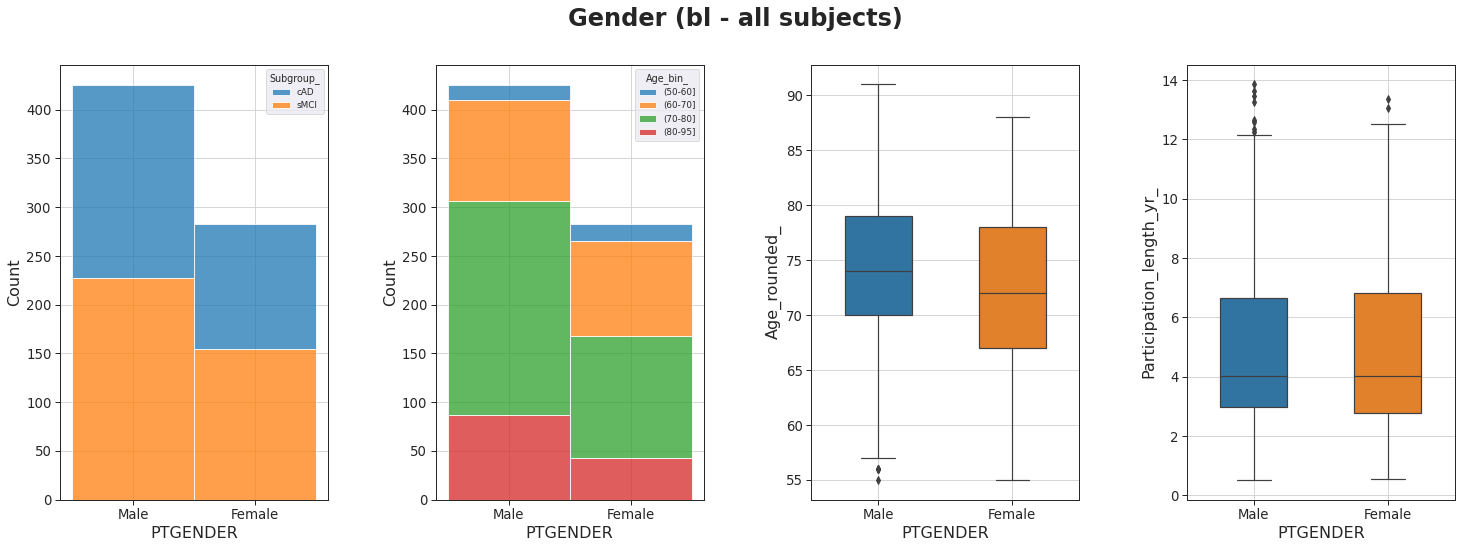

In [46]:
#mbal.plot_subgroup_distributions(bl, split_feature='PTGENDER', suptitle='Gender (bl - all subjects)')
mbal.plot_subgroup_distributions_to_paper(bl, split_feature='PTGENDER', suptitle='Gender (bl - all subjects)',
                                          save_name='balance_train_test')

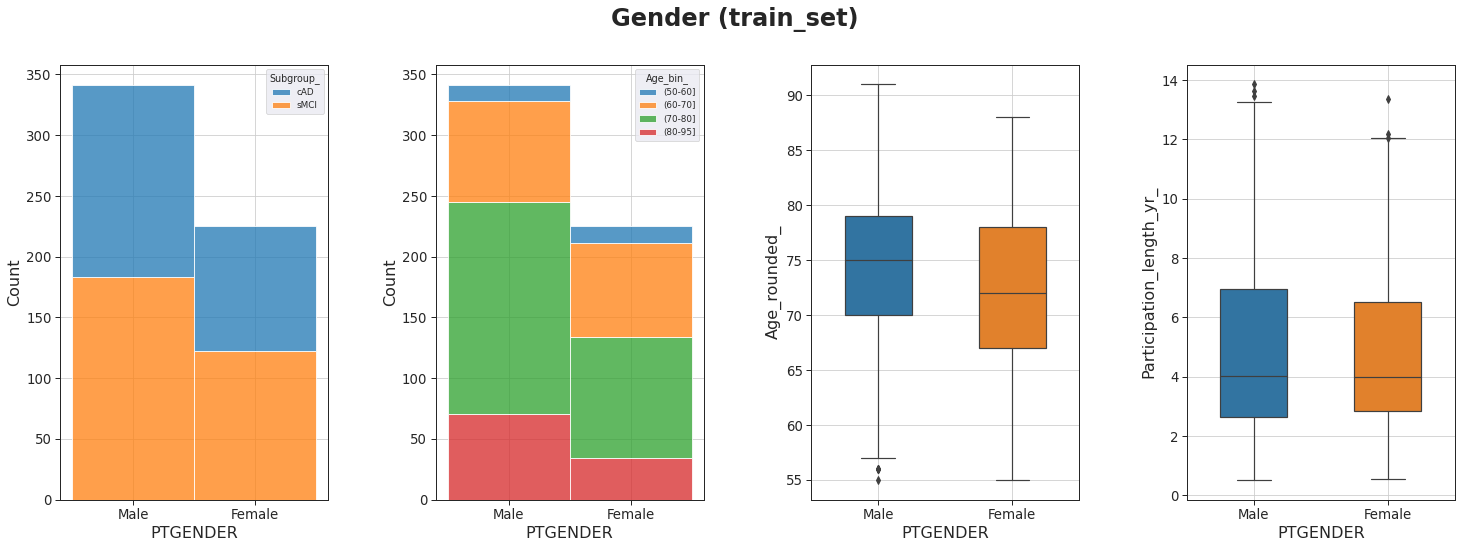

In [45]:
#mbal.plot_subgroup_distributions(train_set, split_feature='PTGENDER', suptitle='Gender (train_set)')
mbal.plot_subgroup_distributions_to_paper(train_set, split_feature='PTGENDER', suptitle='Gender (train_set)',
                                          save_name='gender_train_test')

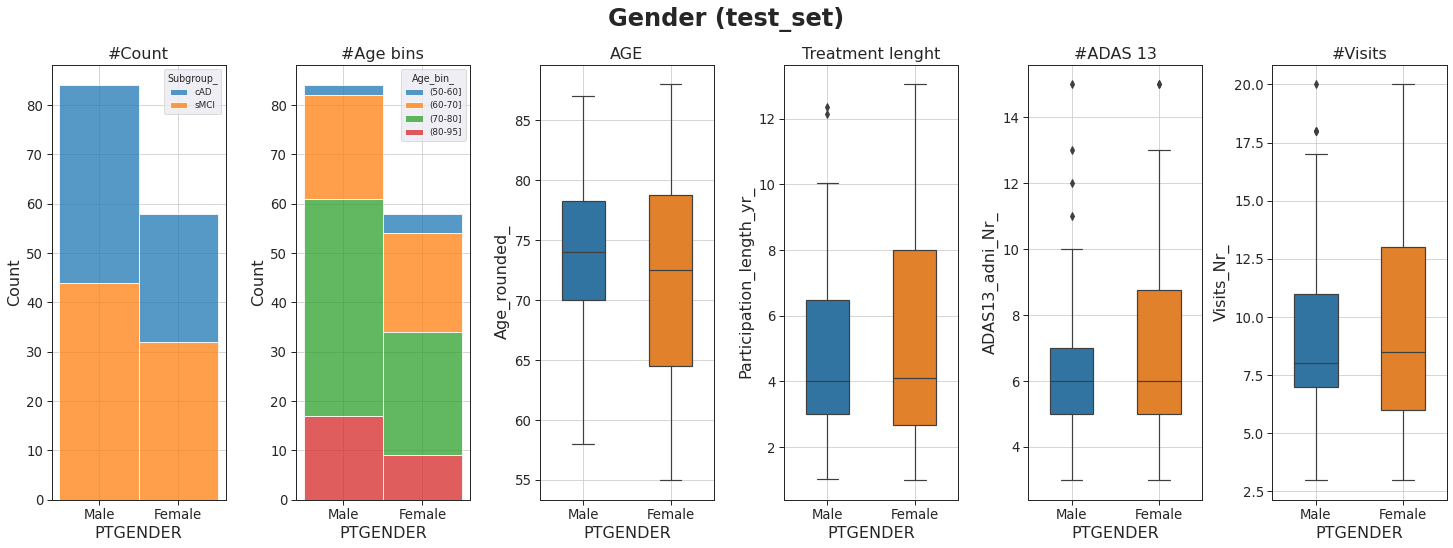

In [31]:
mbal.plot_subgroup_distributions(test_set, split_feature='PTGENDER', suptitle='Gender (test_set)')

---

#### SUBGROUP

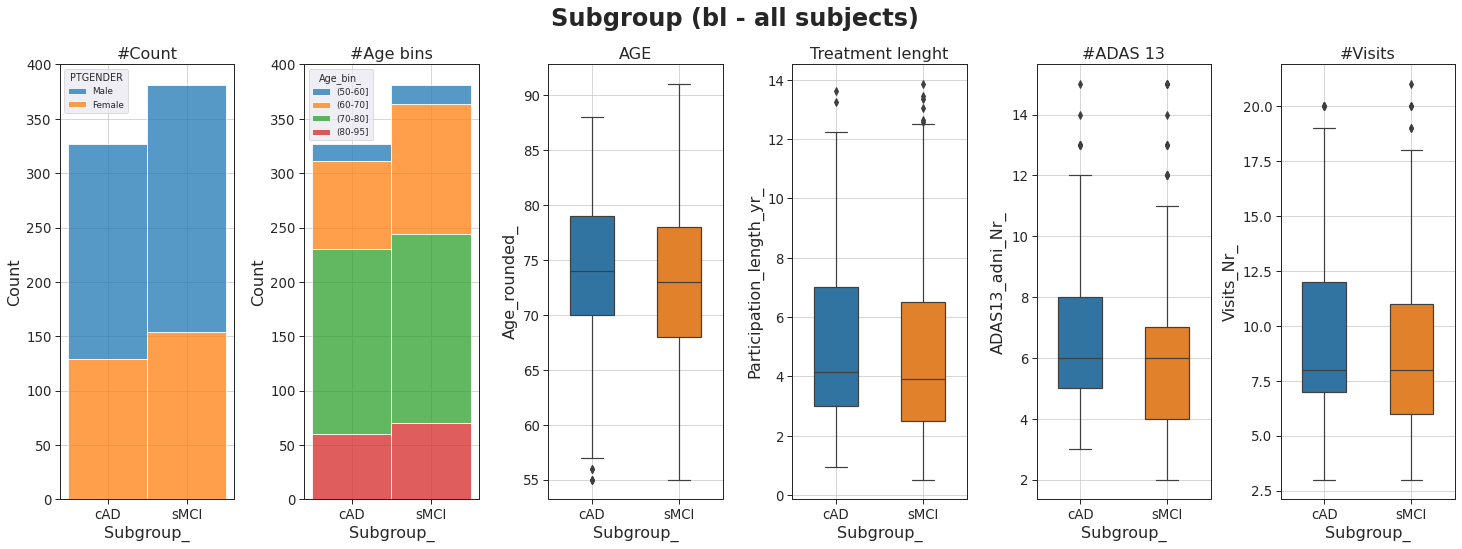

In [30]:
mbal.plot_subgroup_distributions(bl, split_feature='Subgroup_', p0_hue='PTGENDER', suptitle='Subgroup (bl - all subjects)')

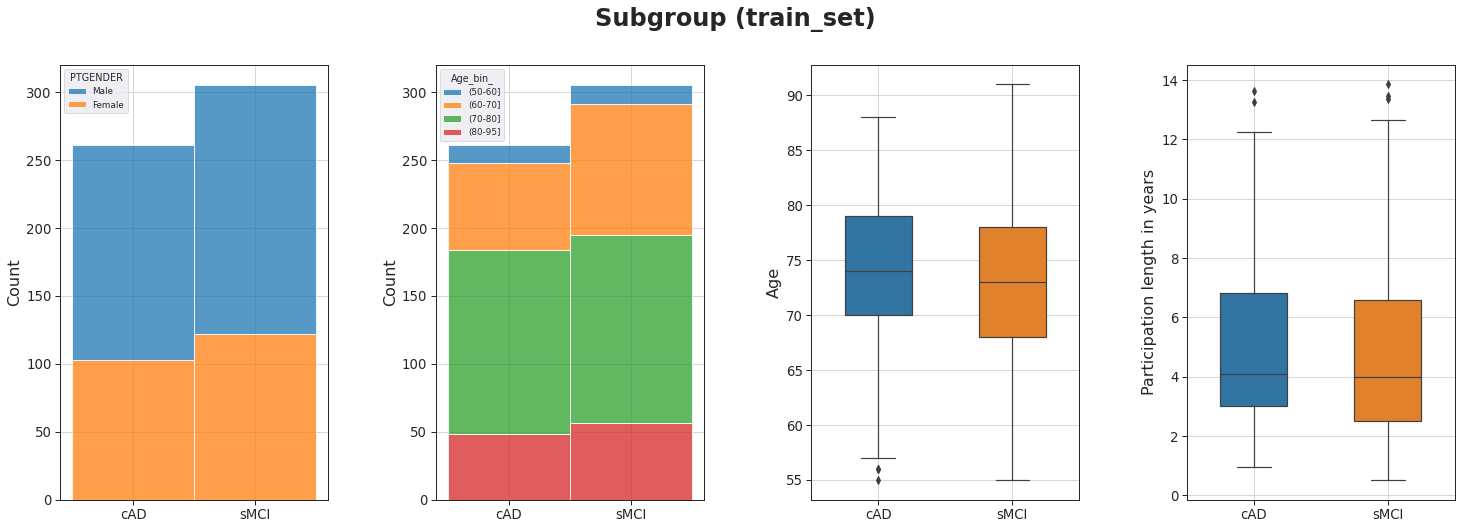

In [59]:
#mbal.plot_subgroup_distributions(train_set, split_feature='Subgroup_', p0_hue='PTGENDER', suptitle='Subgroup (train_set)')
mbal.plot_subgroup_distributions_to_paper(train_set, split_feature='Subgroup_',
                                          p0_hue='PTGENDER', suptitle='Subgroup (train_set)',save_name='subgroup_train_set')

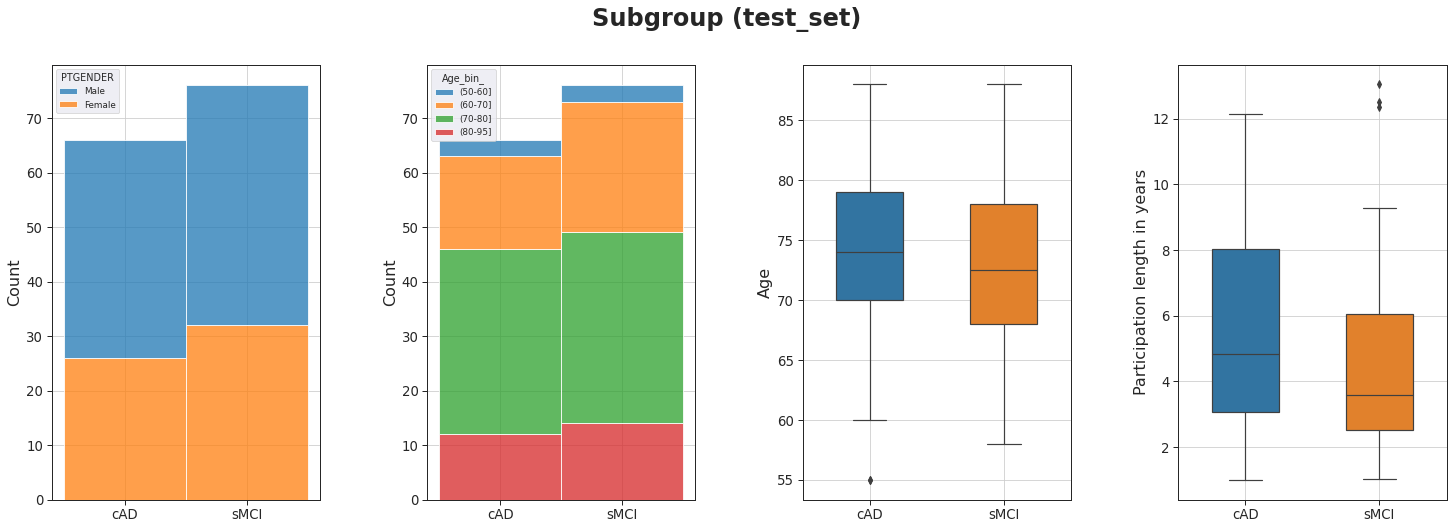

In [60]:
#mbal.plot_subgroup_distributions(test_set, split_feature='Subgroup_', p0_hue='PTGENDER', suptitle='Subgroup (test_set)')
mbal.plot_subgroup_distributions_to_paper(test_set, split_feature='Subgroup_', p0_hue='PTGENDER',
                                          suptitle='Subgroup (test_set)', save_name='subgroup_test_set')

---

---

---

# EXTRA STATISTICS (NOT IMPORTANT - PREVIOUS VERSION OF THE SCRIPT!!!)

## "OUR" GLOBAL VARIABLES

In [33]:
age_intervals = range(55,96,5)

colCAD = '#8fbcda'
colMCI ='#e4acb2'

bl['Age_rounded_'] = bl.Age_rounded_.astype(int)

# AGE

Count subject number in age intervals. The whole all subjects AGE scope is divided into 5 years intervals. For each intervala the number of subjects is counted. 

(54.999, 60.0]     33
(60.0, 65.0]       76
(65.0, 70.0]      125
(70.0, 75.0]      183
(75.0, 80.0]      161
(80.0, 85.0]      106
(85.0, 90.0]       23
(90.0, 95.0]        1
Name: Age_rounded_, dtype: int64


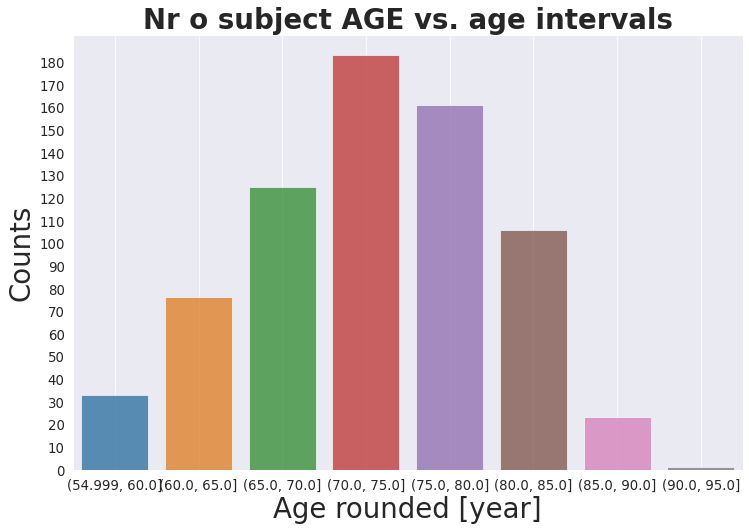

In [34]:
age_counts = bl.Age_rounded_.value_counts(bins=age_intervals, sort=False, dropna=True)
print(age_counts)

f,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=age_counts.index, y=age_counts.values, alpha=0.8, ax=ax)
ax.set_title('Nr o subject AGE vs. age intervals', fontsize='xx-large', fontweight='bold')
ax.set_xlabel('Age rounded [year]', fontsize = 'xx-large')
ax.set_ylabel('Counts',fontsize = 'xx-large')
ax.set_yticks(range(0,181, 10))
ax.grid()

# SUBGROUP

Characterization subjects cohort based on **Subgroup** rightness.

Subject counts in each subgroup:

In [35]:
minfo.feature_split_info(bl, 'Subgroup_')

,Subgroup_,# COL,% COL
1,cAD,327,0.46
0,sMCI,381,0.54


Each column mean values:

In [36]:
bl[cols].groupby('Subgroup_').mean()

,RID,AGE,Age_rounded_,ADAS13_adni,ADAS13_adni_Nr_,TOTAL13_adas,TOTAL13_adas_Nr_,MRIs_Nr_,Participation_length_yr_,Visits_Nr_
Subgroup_,,,,,,,,,,
cAD,2068.14,73.91,73.89,20.31,6.69,20.31,6.69,5.85,5.07,9.50
sMCI,2786.45,73.04,73.02,14.53,6.07,14.53,6.07,5.33,4.53,8.47


Std for each column.

In [37]:
bl[cols].groupby('Subgroup_').std()

,RID,AGE,Age_rounded_,ADAS13_adni,ADAS13_adni_Nr_,TOTAL13_adas,TOTAL13_adas_Nr_,MRIs_Nr_,Participation_length_yr_,Visits_Nr_
Subgroup_,,,,,,,,,,
cAD,1789.03,7.07,7.08,6.19,2.30,6.19,2.30,1.61,2.72,3.93
sMCI,1705.79,7.51,7.50,5.72,2.53,5.72,2.53,1.55,2.80,3.61


Each column count. In some columns thes numbers might differ from total number of subject as NaN appears occasionally. 

In [38]:
bl[cols].groupby('Subgroup_').count()

,RID,PTGENDER,AGE,Age_rounded_,ADAS13_adni,ADAS13_adni_Nr_,TOTAL13_adas,TOTAL13_adas_Nr_,MRIs_Nr_,Participation_length_yr_,Visits_Nr_
Subgroup_,,,,,,,,,,,
cAD,327,327,327,327,325,327,325,327,327,327,327
sMCI,381,381,381,381,381,381,381,381,381,381,381


### SUBGROUP AND GENDER

In [39]:
bl[cols].groupby(['Subgroup_', 'PTGENDER']).mean()

RID    AGE  Age_rounded_  ADAS13_adni  \
Subgroup_ PTGENDER                                              
cAD       Female    2292.18  72.56         72.55        20.95   
          Male      1922.17  74.79         74.76        19.89   
sMCI      Female    2856.64  72.00         71.99        13.45   
          Male      2738.83  73.74         73.72        15.26   

                    ADAS13_adni_Nr_  TOTAL13_adas  TOTAL13_adas_Nr_  MRIs_Nr_  \
Subgroup_ PTGENDER                                                              
cAD       Female               6.59         20.95              6.59      5.69   
          Male                 6.76         19.89              6.76      5.95   
sMCI      Female               6.08         13.45              6.08      5.25   
          Male                 6.07         15.26              6.07      5.38   

                    Participation_length_yr_  Visits_Nr_  
Subgroup_ PTGENDER                                        
cAD       Female                        5.09        9.33  
          Male                          5.05        9.61  
sMCI      Female                        4.45        8.40  
          Male                          4.58        8.52

In [40]:
bl[cols].groupby(['Subgroup_', 'PTGENDER']).count()

RID  AGE  Age_rounded_  ADAS13_adni  ADAS13_adni_Nr_  \
Subgroup_ PTGENDER                                                         
cAD       Female    129  129           129          128              129   
          Male      198  198           198          197              198   
sMCI      Female    154  154           154          154              154   
          Male      227  227           227          227              227   

                    TOTAL13_adas  TOTAL13_adas_Nr_  MRIs_Nr_  \
Subgroup_ PTGENDER                                             
cAD       Female             128               129       129   
          Male               197               198       198   
sMCI      Female             154               154       154   
          Male               227               227       227   

                    Participation_length_yr_  Visits_Nr_  
Subgroup_ PTGENDER                                        
cAD       Female                         129         129  
          Male                           198         198  
sMCI      Female                         154         154  
          Male                           227         227

---

## PLOT OF SUBJECT COUNT AGAINST AGE

<AxesSubplot:title={'center':'Distribution'}, xlabel='Age_rounded_'>

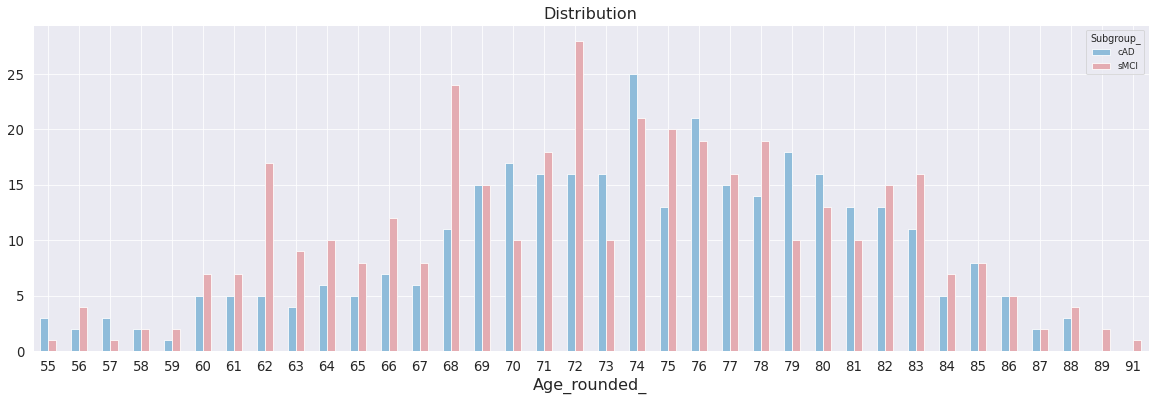

In [41]:
plot_df = bl[['Age_rounded_','Subgroup_']]
plot_df_sorted = plot_df.pivot_table(index=['Age_rounded_'], columns=['Subgroup_'], aggfunc=len).sort_values('Age_rounded_', ascending=True) 
plot_df_sorted.plot(kind='bar', title="Distribution", stacked=False, figsize=(20,6), color=[colCAD, colMCI], grid=True, rot=0)

## COUNT SUBGROUP SUBJECTS AGAINST AGE

In [42]:
smci = bl[bl.Subgroup_ == 'sMCI']
cad = bl[bl.Subgroup_ == 'cAD']
#print(smci.shape[0], cad.shape[0])

smci_df= smci.Age_rounded_.value_counts(bins=age_intervals, sort=False).rename_axis('bin').reset_index(name='#smci')
cad_df = cad.Age_rounded_.value_counts(bins=age_intervals, sort=False).rename_axis('bin').reset_index(name='#cad')
bl_df = bl.Age_rounded_.value_counts(bins=age_intervals, sort=False).rename_axis('bin').reset_index(name='#all (bl)')

df = pd.merge(smci_df,cad_df, how='left', on='bin',indicator='MERGE-smci-cad')
df = pd.merge(df,bl_df, how='left', on='bin',indicator='MERGE-smci-cad-bl')
if (df['MERGE-smci-cad']  == df['MERGE-smci-cad-bl']).all():
    df.drop(columns=['MERGE-smci-cad','MERGE-smci-cad-bl'], inplace=True)
print()
print(df.sum())
print()
df


#smci        381
#cad         327
#all (bl)    708
dtype: int64



,bin,#smci,#cad,#all (bl)
0,"(54.999, 60.0]",17,16,33
1,"(60.0, 65.0]",51,25,76
2,"(65.0, 70.0]",69,56,125
3,"(70.0, 75.0]",97,86,183
4,"(75.0, 80.0]",77,84,161
5,"(80.0, 85.0]",56,50,106
6,"(85.0, 90.0]",13,10,23
7,"(90.0, 95.0]",1,0,1


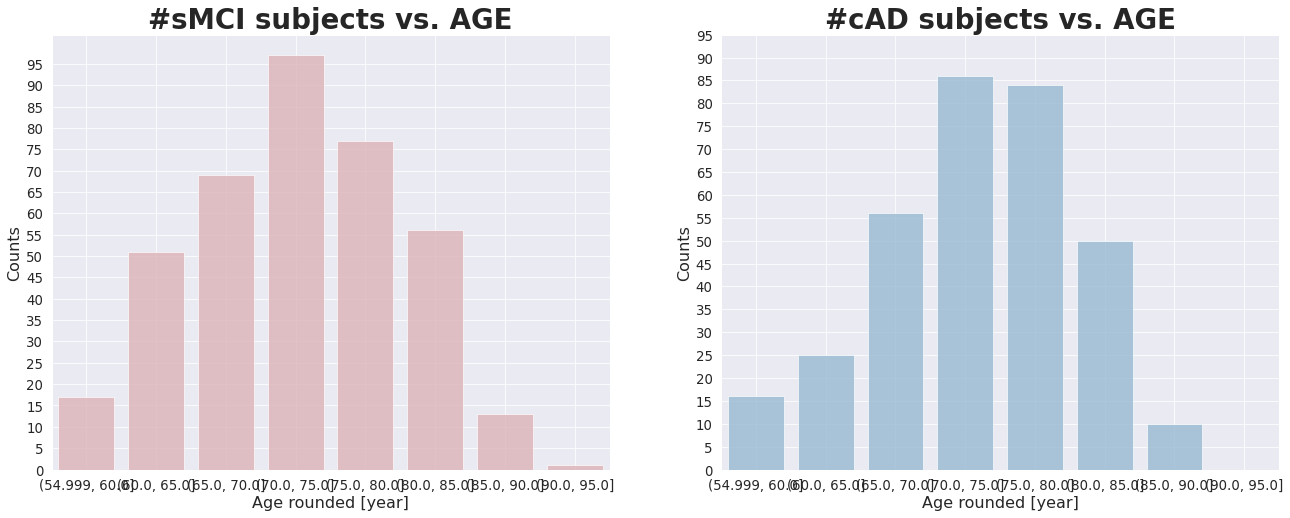

In [43]:
smci_counts= smci.Age_rounded_.value_counts(bins=age_intervals, sort=False)
cad_counts = cad.Age_rounded_.value_counts(bins=age_intervals, sort=False)
bl_counts = bl.Age_rounded_.value_counts(bins=age_intervals, sort=False)

f,ax = plt.subplots(1,2,sharey=False, figsize=(22,8))
sns.barplot(x=smci_counts.index, y=smci_counts.values, alpha=0.8, ax=ax[0], color=colMCI)
ax[0].set_title('#sMCI subjects vs. AGE', fontsize='xx-large', fontweight='bold')
sns.barplot(x=cad_counts.index, y=cad_counts.values, alpha=0.8, ax=ax[1], color=colCAD)
ax[1].set_title('#cAD subjects vs. AGE', fontsize='xx-large',fontweight='bold')

for a in ax:
    a.set_xlabel('Age rounded [year]')
    a.set_ylabel('Counts')
    #a.set_aspect('equal')
    a.set_yticks(range(0,100,5))
    a.grid(True)

---

# GENDER

<AxesSubplot:title={'center':'Distribution'}, xlabel='Age_rounded_'>

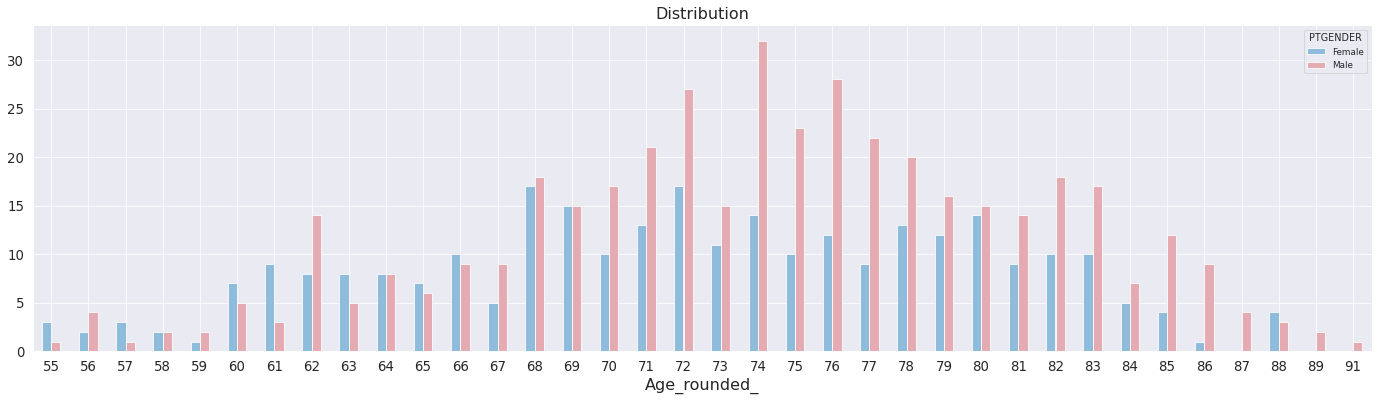

In [44]:
plot_df = bl[['Age_rounded_','PTGENDER']]
plot_df_sorted = plot_df.pivot_table(index=['Age_rounded_'], columns=['PTGENDER'], aggfunc=len).sort_values('Age_rounded_', ascending=True) 
plot_df_sorted.plot(kind='bar',figsize=(24,6), title="Distribution", stacked=False, color=['#8fbcda','#e4acb2'], grid=True, rot=0)


## COUNT PTGENDER SUBJECTS AGAINST AGE

In [45]:
male = bl[bl.PTGENDER == 'Male']
female = bl[bl.PTGENDER == 'Female']
#print(len(male), female.shape[0], bl.PTGENDER.value_counts(normalize=True))


male_df= male.Age_rounded_.value_counts(bins=age_intervals,
                                        sort=False).rename_axis('bin').reset_index(name='male_nr_')
female_df = female.Age_rounded_.value_counts(bins=age_intervals,
                                             sort=False).rename_axis('bin').reset_index(name='female_nr_')
bl_df = bl.Age_rounded_.value_counts(bins=age_intervals, sort=False).rename_axis('bin').reset_index(name='all_nr_')

df = pd.merge(male_df,female_df, how='left', on='bin',indicator='MERGE-male-female')
df = pd.merge(df,bl_df, how='left', on='bin',indicator='MERGE-male-female-bl')

df['male_nr_'] = df.male_nr_.astype(int)
df['female_nr_'] = df.female_nr_.astype(int)

if (df['MERGE-male-female']  == df['MERGE-male-female-bl']).all():
    df.drop(columns=['MERGE-male-female','MERGE-male-female-bl'], inplace=True)

print()
print(df.sum())
print()
df


male_nr_      425
female_nr_    283
all_nr_       708
dtype: int64



,bin,male_nr_,female_nr_,all_nr_
0,"(54.999, 60.0]",15,18,33
1,"(60.0, 65.0]",36,40,76
2,"(65.0, 70.0]",68,57,125
3,"(70.0, 75.0]",118,65,183
4,"(75.0, 80.0]",101,60,161
5,"(80.0, 85.0]",68,38,106
6,"(85.0, 90.0]",18,5,23
7,"(90.0, 95.0]",1,0,1


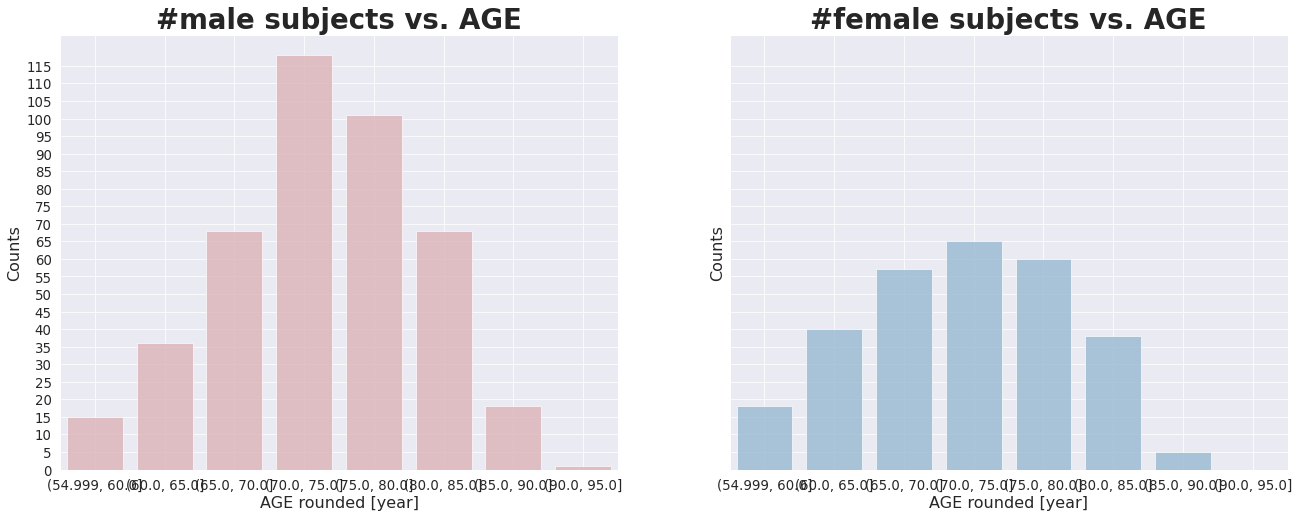

In [46]:
male_counts= male.Age_rounded_.value_counts(bins=age_intervals, sort=False)
female_counts = female.Age_rounded_.value_counts(bins=age_intervals, sort=False)
bl_counts = bl.Age_rounded_.value_counts(bins=age_intervals, sort=False)

f,ax = plt.subplots(1,2,sharey=True, figsize=(22,8))
sns.barplot(x=male_counts.index, y=male_counts.values, alpha=0.8, ax=ax[0], color=colMCI)
ax[0].set_title('#male subjects vs. AGE', fontsize='xx-large', fontweight='bold')
sns.barplot(x=female_counts.index, y=female_counts.values, alpha=0.8, ax=ax[1], color=colCAD)
ax[1].set_title('#female subjects vs. AGE', fontsize='xx-large',fontweight='bold')

for a in ax:
    a.set_xlabel('AGE rounded [year]')
    a.set_ylabel('Counts')
    #a.set_aspect('equal')
    a.set_yticks(range(0,120,5))
    a.grid(True)

---

---

---

### NIE KASUJ TYCH KOMOREK !!!!

In [47]:
# cor = bl_new[cols2].corr().abs()
# plt.figure(figsize=(15,15))
# sns.heatmap(cor, annot=True, cmap='RdBu_r')

In [48]:
# bl.loc[(bl.AGE_rounded_ > 50) & (bl.AGE_rounded_ <= 60), 'AGE_group_'] = 1
# bl.loc[(bl.AGE_rounded_ > 60) & (bl.AGE_rounded_ <= 65), 'AGE_group_'] = 2
# bl.loc[(bl.AGE_rounded_ > 65) & (bl.AGE_rounded_ <= 70), 'AGE_group_'] = 3
# bl.loc[(bl.AGE_rounded_ > 70) & (bl.AGE_rounded_ <= 75), 'AGE_group_'] = 4
# bl.loc[(bl.AGE_rounded_ > 75) & (bl.AGE_rounded_ <= 80), 'AGE_group_'] = 5
# bl.loc[(bl.AGE_rounded_ > 80) & (bl.AGE_rounded_ <= 85), 'AGE_group_'] = 6
# bl.loc[(bl.AGE_rounded_ > 85) & (bl.AGE_rounded_ <= 95), 'AGE_group_'] = 7

# bl['AGE_group_'] = bl.AGE_group_.astype(int)

In [49]:
# s1 = bl.AGE_group2_.value_counts(sort=True)
# s2 = bl.AGE_group_.value_counts(sort=True)

# d1 = s1.to_frame().rename_axis('bin')
# d2 = s2.to_frame().rename_axis('bin')
# df = pd.merge(d1,d2,how='left', on='bin')
# df